# Quantum Fisher Information


Importo tutte le dipendenze necessarie e imposto i parametri del problema (NB: c'è bisogno del pacchetto QuTip)

In [11]:
import quantum_walks as qw
import numpy as np
import matplotlib.pyplot as plt

t_initial=0
t_final=65
time_step=0.1

#Creo le hamiltoniane con ostacolo di altezza Delta e Delta+epsilon
nsites = 101
delta = 2
epsilon = 1E-4
ham1 = qw.DeltaHamiltonian(nsites, delta)
ham2 = qw.DeltaHamiltonian(nsites, delta + epsilon)

#Per considerare il caso con condizioni periodiche al contorno basta impostare is_cycle=True come qui sotto
#ham1 = qw.DeltaHamiltonian(nsites, delta, is_cycle=True)
#ham2 = qw.DeltaHamiltonian(nsites, delta+epsilon, is_cycle=True)

#Creazione dei "walker" gaussiani
pos_in = 25 #Valore medio della gaussiana
sigma = 10
k0 = np.pi / 2
walker1 = qw.GaussianWalker(ham1, pos_in, sigma, k0)
walker2 = qw.GaussianWalker(ham2, pos_in, sigma, k0)

Effettuo l'evoluzione dei due stati secondo le due hamiltoniane. La QFI è calcolata come

$$H(\Delta)\approx8\frac{1-|\langle{\psi_{\Delta}(t)|\psi_{\Delta+\epsilon}(t)}\rangle|}{\epsilon^2}$$

In [12]:
nsteps=int((t_final-t_initial)/time_step)+1
time_array=np.zeros(nsteps)
qfi_array=np.zeros(nsteps)

for i in range(nsteps):
    walker1.evolve(time_step*i)
    walker2.evolve(time_step*i)
    time_array[i]=time_step*i
    qfi_array[i]=qw.qfi(walker1,walker2,epsilon)

Faccio il grafico

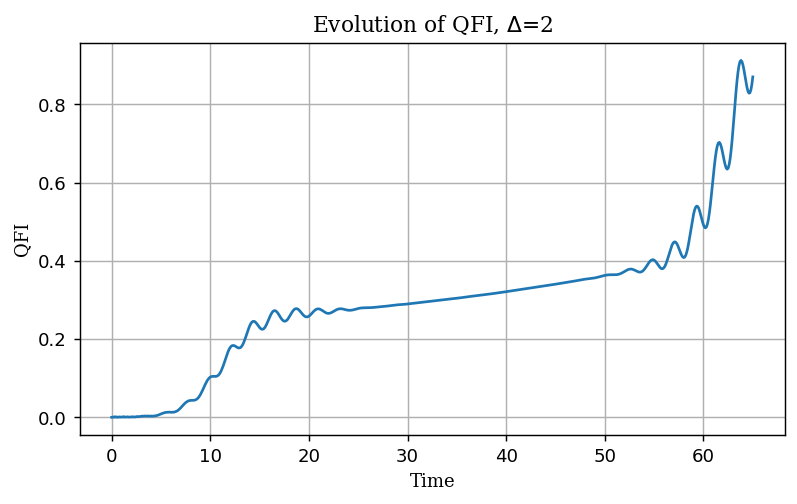

In [13]:
plt.figure(figsize=(7,4),dpi=130)
plt.plot(time_array, qfi_array)
plt.grid(True)
plt.xlabel('Time',fontname="serif")
plt.ylabel('QFI',fontname="serif")
plt.title("Evolution of QFI, $\Delta$=" + str(delta),fontname="serif")
plt.show()

Per $k_0=\frac{\pi}{2}$ il primo incontro con l'ostacolo avviene a $t\approx 10$, poi il pacchetto gaussiano si divide in due pacchetti che vanno da parti opposte, i quali si incontrano nuovamente al centro a $t\approx 60$ (dopo essere stati riflessi ai margini).